In [2]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

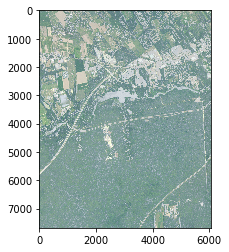

In [3]:
pil_image = Image.open('/Users/alexrojas/Documents/Academic/ComputerScience/Programming/Tutorials/Data/m_4007203_sw_18_1_20170809/SflkPineForest.tif')
rgbnir_array = np.array(pil_image)
plt.imshow(pil_image)

In [5]:
# split image file into seperate bands
r_pil, g_pil, b_pil, nir_pil = Image.Image.split(pil_image)

In [6]:
# convert PIL image objects to array
r_array = np.array(r_pil)
g_array = np.array(g_pil)
b_array = np.array(b_pil)
nir_array = np.array(nir_pil)

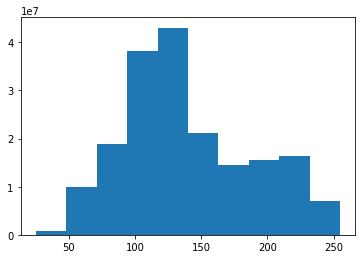

In [12]:
# plot histogram
plt.hist(rgbnir_array.ravel())
plt.show()

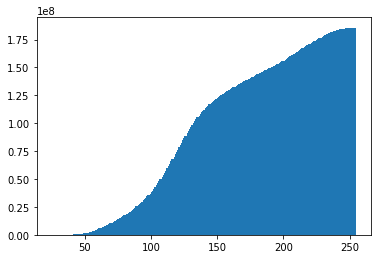

In [16]:
# plot cumuulative frequency distribution
plt.hist(rgbnir_array.ravel(), bins = 255, cumulative=True)
plt.show()

In [7]:
# create an rgb composite by using numpy dstack function
rgb_array = np.dstack((r_array,g_array,b_array))

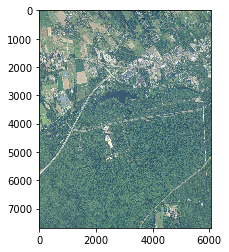

In [41]:
plt.imshow(rgb_array)

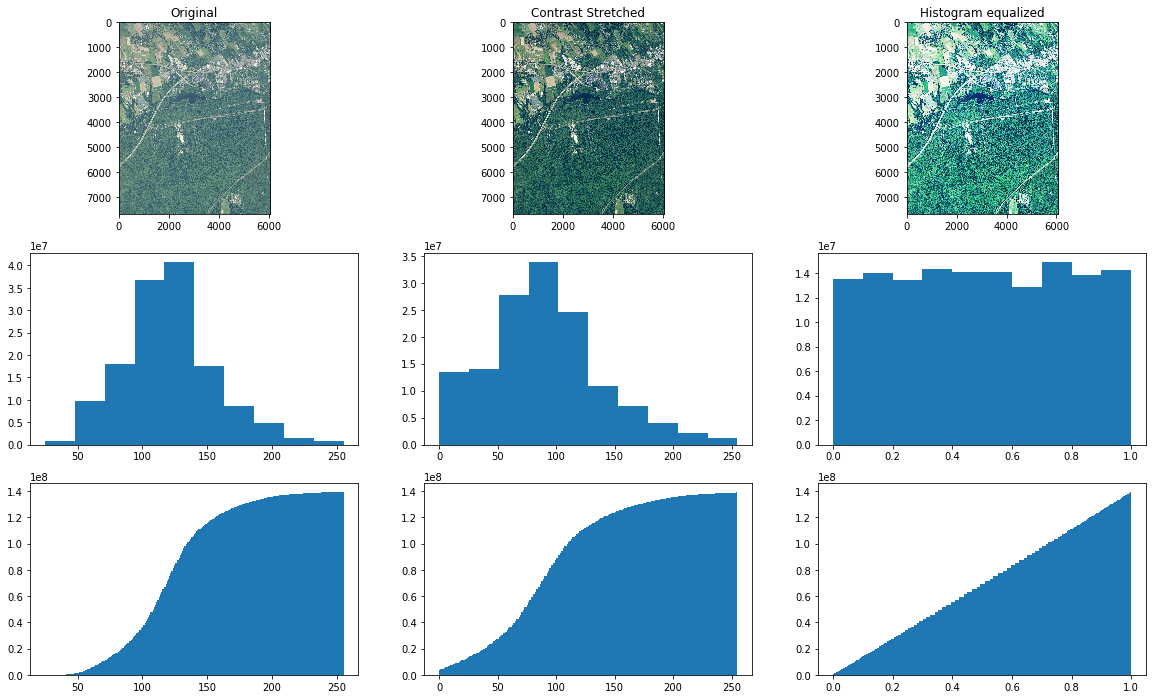

In [37]:
from skimage import exposure

# contrast stretching
p2 = np.percentile(rgbnir_array, 2)
p98 = np.percentile(rgbnir_array, 98)
image_ct = exposure.rescale_intensity(rgb_array, in_range=(p2, p98))

# Histogram equalization
image_eq = exposure.equalize_hist(rgb_array)

# set up subplot for images
fig = plt.figure(figsize=(20, 12))

# Subplot for original image
a=fig.add_subplot(3,3,1)
imgplot = plt.imshow(rgb_array)
a.set_title('Original')

# Subplot for contrast stretch image
a=fig.add_subplot(3,3,2)
imgplot = plt.imshow(image_ct)
a.set_title('Contrast Stretched')

# Subplot for equalized stretch image
a=fig.add_subplot(3,3,3)
imgplot = plt.imshow(image_eq)
a.set_title('Histogram equalized')

# Subplots for histograms
a=fig.add_subplot(3,3,4)
imgplot = plt.hist(rgb_array.ravel())

a=fig.add_subplot(3,3,5)
imgplot = plt.hist(image_ct.ravel())

a=fig.add_subplot(3,3,6)
imgplot = plt.hist(image_eq.ravel())

# Subplots for CDF
a = fig.add_subplot(3,3,7)
img_plot = plt.hist(rgb_array.ravel(), bins = 255, cumulative=True)

a = fig.add_subplot(3,3,8)
img_plot = plt.hist(image_ct.ravel(), bins = 255, cumulative=True)

a = fig.add_subplot(3,3,9)
img_plot = plt.hist(image_eq.ravel(), bins = 255, cumulative=True)

plt.show()

PIL.Image.Image

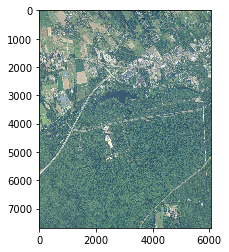

In [8]:
rgb_pil = Image.fromarray(rgb_array)
plt.imshow(rgb_pil)
type(rgb_pil)

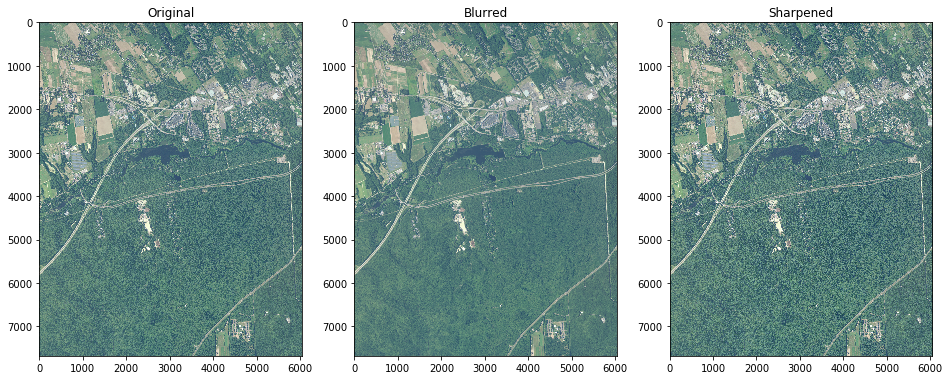

In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

blurred_image = rgb_pil.filter(ImageFilter.BLUR)
sharpened_image = rgb_pil.filter(ImageFilter.SHARPEN)

# Display it
fig = plt.figure(figsize=(16, 12))

# plot original image
a=fig.add_subplot(1,3,1)
img_plot_1 = plt.imshow(rgb_pil)
a.set_title('Original')

# plot blurred image
a=fig.add_subplot(1,3,2)
img_plot_1 = plt.imshow(blurred_image)
a.set_title('Blurred')

# plot sharpened image
a=fig.add_subplot(1,3,3)
img_plot_1 = plt.imshow(sharpened_image)
a.set_title('Sharpened')

plt.show()

Text(0.5, 1.0, 'Filtered Image')

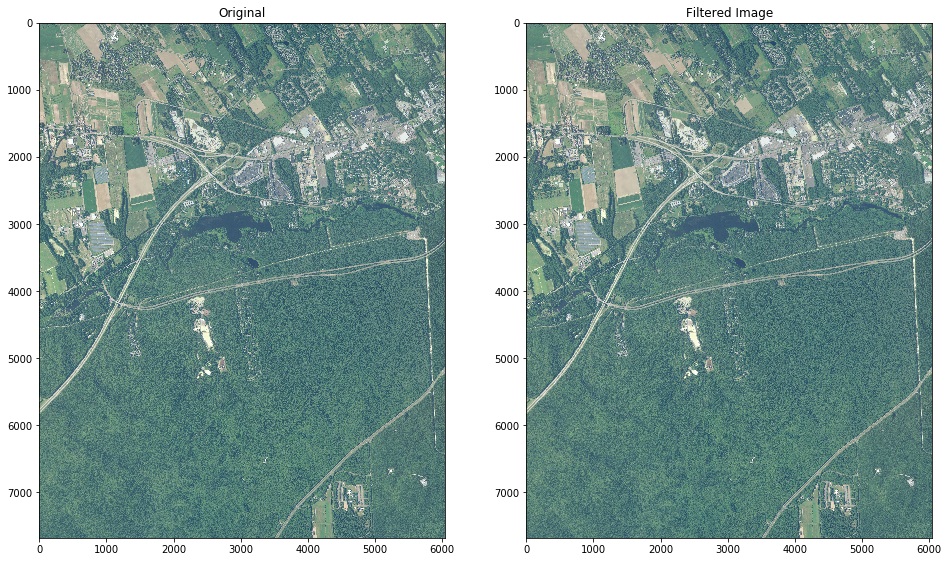

In [57]:
# create your own filter

my_kernel = (200, 50, -100,
            -50, 200, -50,
            -100, 50, 200)

filtered_image = rgb_pil.filter(ImageFilter.Kernel((3,3), my_kernel))

# set up sub plot to display
fig = plt.figure(figsize=(16, 12))

# plot original image
a=fig.add_subplot(1,2,1)
image_plot1 = plt.imshow(rgb_pil)
a.set_title('Original')

# plot filtered image
a=fig.add_subplot(1,2,2)
image_plot2 = plt.imshow(filtered_image)
a.set_title('Filtered Image')

plt.show()

Text(0.5, 1.0, 'Edges Filtered Image')

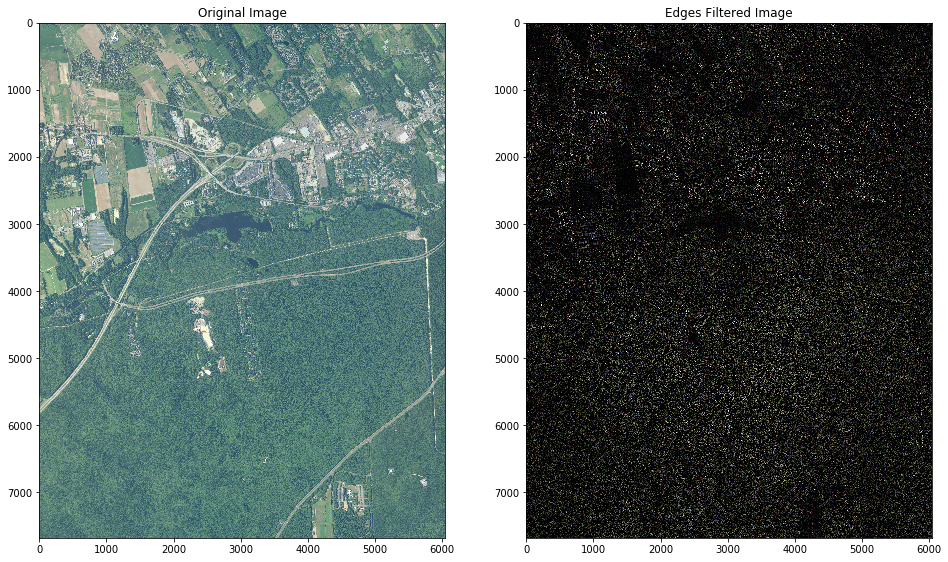

In [12]:
# detect edges of objects using PIL Image FIND_EDGES filter

import os
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

edges_image = rgb_pil.filter(ImageFilter.FIND_EDGES)

# display it with matplotlib
fig = plt.figure(figsize=(16,12))

# plot original image
a=fig.add_subplot(1,2,1)
img_1 = plt.imshow(rgb_pil)
a.set_title('Original Image')

# plot edge filtered image
a=fig.add_subplot(1,2,2)
img_2 = plt.imshow(edges_image)
a.set_title('Edges Filtered Image')

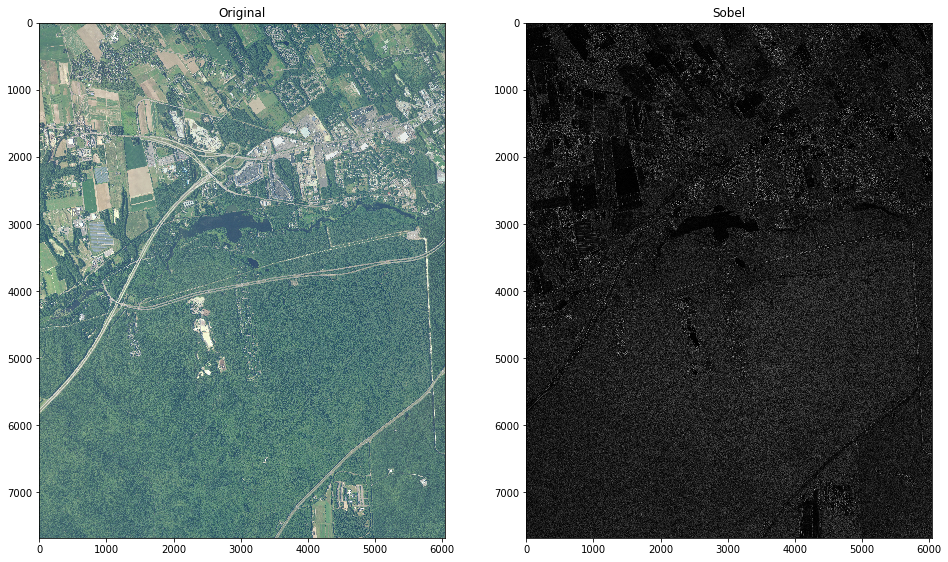

In [16]:
def edge_sobel(image):
    from scipy import ndimage
    import skimage.color as sc
    import numpy as np
    image = sc.rgb2gray(image) # Convert color image to gray scale
    dx = ndimage.sobel(image, 1)  # horizontal derivative
    dy = ndimage.sobel(image, 0)  # vertical derivative
    mag = np.hypot(dx, dy)  # magnitude
    mag *= 255.0 / np.amax(mag)  # normalize (Q&D)
    mag = mag.astype(np.uint8)
    return mag

sobel_image = edge_sobel(np.array(rgb_pil))

# Display it
fig = plt.figure(figsize=(16, 12))

# Plot original image
a=fig.add_subplot(1, 2, 1)
image_plot_1 = plt.imshow(rgb_pil)
a.set_title("Original")

# Plot Sobel image
a=fig.add_subplot(1, 2, 2)
image_plot_2 = plt.imshow(sobel_image, cmap="gray") # Need to use a gray color map as we converted this to a grayscale image
a.set_title("Sobel")

plt.show()